### Grocery store data: https://www.kaggle.com/heeraldedhia/groceries-dataset

In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
#from apyori import apriori
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

### There are three major components of the Apriori algorithm:
#### 1. Support in our use case refers to the most popular item and it is calculated as the number of times an item is bought divided by the total number of items For example, we have ~30K customers, 20K bought milk therefore Support (Milk) = 0.66 or 67%

##### Support is popularity of the item

#### 2. Confidence refers to the is the likelihood of people also buying milk if they have bought beef. It can be calculated by finding the number of transactions where milk and beef were bought together, divided by the total number of transactions where beef is bought.

##### Confidence is the likelihood of people also buying milk if they bought the beef

#### 3. Lift refers to the increase in the ratio of the sale of milk when beef is sold. It can be calculated by dividing Confidence(milk -> beef) divided by Support(milk). Mathematically it can be represented as:
#### Lift basically tells us that the likelihood of buying milk and beef together is more than the likelihood of just buying the milk. A Lift of 1 means there is no association between products. Lift of greater than 1 means that products are more likely to be bought together.

##### Lift(milk -> beef) refers to the increase in the ratio of the sale of milk when beef is sold. Lift basically tells us that the likelihood of buying milk and beef together is 'x' times more than the likelihood of just buying the milk. A Lift of 1 means there is no association between products. Lift of greater than 1 means that products are more likely to be bought together.

##### Inspiration: https://medium.com/@fabio.italiano/the-apriori-algorithm-in-python-expanding-thors-fan-base-501950d55be9

In [96]:
df = pd.read_csv("C:/Users/mruna/OneDrive/Desktop/Personal/Kaggle netflix review/Grocery store MBA/Groceries_dataset.csv")

In [62]:
#df.info()
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [63]:
all_products=df['itemDescription'].value_counts()
all_products

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
make up remover             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

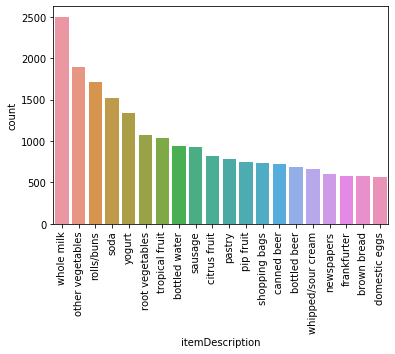

In [64]:
sns.countplot(x= 'itemDescription',data=df, order=df['itemDescription'].value_counts().iloc[:20].index)  # top products
plt.xticks(rotation=90)

In [65]:
dft=df.drop(['Date'], axis=1)
dft

,Member_number,itemDescription
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk
...,...,...
38760,4471,sliced cheese
38761,2022,candy
38762,1097,cake bar
38763,1510,fruit/vegetable juice


In [147]:
ts1=df.groupby(['Member_number','itemDescription']).size().reset_index(name='count') 
                                        #calculates size and creates new column count

test_items=(ts1.groupby(['Member_number','itemDescription'])['count'].sum()
            .unstack().reset_index().fillna(0).set_index('Member_number'))

# unstack = pivot. Unstack pivots the last level of the df. In this case item_description got pivoted.
# reset_index will get the columns in one row which were uneven due to above step
# fillna(0): due to pivoting/unstacking, NAs were generated which will be filled with 0
# unstack is useful for pivoting as it preserves the column name

In [148]:
test_items

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
#The 0/1 encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
item_sets = test_items.applymap(encode_units)

In [150]:
item_sets

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
frequent_itemsets=apriori(item_sets, min_support=.02, use_colnames=True)
rules=association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)

In [160]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2769,"(yogurt, bottled water, other vegetables)",(whole milk),0.032324,0.458184,0.022063,0.682540,1.489664,0.007252,1.706721
1120,"(shopping bags, bottled beer)",(whole milk),0.030272,0.458184,0.020010,0.661017,1.442690,0.006140,1.598358
2881,"(yogurt, rolls/buns, other vegetables)",(whole milk),0.052335,0.458184,0.034377,0.656863,1.433623,0.010398,1.579008
1516,"(canned beer, shopping bags)",(whole milk),0.033607,0.458184,0.022063,0.656489,1.432806,0.006664,1.577287
2923,"(soda, yogurt, other vegetables)",(whole milk),0.043099,0.458184,0.027963,0.648810,1.416047,0.008216,1.542799
...,...,...,...,...,...,...,...,...,...
1788,(whole milk),"(domestic eggs, tropical fruit)",0.458184,0.034377,0.020010,0.043673,1.270428,0.004259,1.009721
1565,(whole milk),"(chocolate, yogurt)",0.458184,0.032068,0.020010,0.043673,1.361899,0.005317,1.012135
1121,(whole milk),"(shopping bags, bottled beer)",0.458184,0.030272,0.020010,0.043673,1.442690,0.006140,1.014013
1751,(whole milk),"(tropical fruit, curd)",0.458184,0.036429,0.020010,0.043673,1.198855,0.003319,1.007575


In [189]:
rules2 = rules[ (rules['lift'] > 1.4) &
                (rules['confidence'] > 0.5) ]
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2769,"(yogurt, bottled water, other vegetables)",(whole milk),0.032324,0.458184,0.022063,0.682540,1.489664,0.007252,1.706721
1120,"(shopping bags, bottled beer)",(whole milk),0.030272,0.458184,0.020010,0.661017,1.442690,0.006140,1.598358
2881,"(yogurt, rolls/buns, other vegetables)",(whole milk),0.052335,0.458184,0.034377,0.656863,1.433623,0.010398,1.579008
1516,"(canned beer, shopping bags)",(whole milk),0.033607,0.458184,0.022063,0.656489,1.432806,0.006664,1.577287
2923,"(soda, yogurt, other vegetables)",(whole milk),0.043099,0.458184,0.027963,0.648810,1.416047,0.008216,1.542799
2937,"(tropical fruit, yogurt, other vegetables)",(whole milk),0.032837,0.458184,0.021293,0.648438,1.415235,0.006247,1.541166
2782,"(pastry, rolls/buns, other vegetables)",(whole milk),0.032324,0.458184,0.020780,0.642857,1.403056,0.005969,1.517086
2752,"(whole milk, soda, bottled water)",(other vegetables),0.040021,0.376603,0.022063,0.551282,1.463827,0.006991,1.389284
322,(cat food),(other vegetables),0.043869,0.376603,0.024115,0.549708,1.459646,0.007594,1.384426
2766,"(whole milk, yogurt, bottled water)",(other vegetables),0.040277,0.376603,0.022063,0.547771,1.454503,0.006894,1.378497


In [191]:
#output the results to a csv file
rules2.to_csv("retail_basket.csv") ## moving to tableau for quick vizualization of the output to derive insights

In [72]:
#pip install mlxtend  

In [94]:
# x = df[(df['Member_number'] == 1808) & (df['Date'] == '21-07-2015')] ## check if customer is buying multiple items on same day
# x.head()
# type(rules)

pandas.core.frame.DataFrame

In [153]:
#len(df)
# df.values[1000,2]

In [43]:
#associations = apriori(obs, min_length = 2, min_support = 0.2, min_confidence = 0.2, min_lift = 3)

In [44]:
#associations = list(associations)

In [41]:
print(len(associations))
#print(associations[1])

0
